In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read data for the hero 'EarthShaker'
es = pd.read_csv('ES_data.csv', usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13])

In [3]:
es.head()

,lane,last_hits,denies,gold_per_min,xp_per_min,tower_damage,hero_damage,hero_healing,camps_stacked,kills,deaths,assists,sen_placed,obs_placed
0,2,335,16,557,802,299,35693,0,0,15,6,9,1,2
1,3,77,1,355,674,512,30811,0,1,11,12,24,1,4
2,2,58,0,456,795,382,17745,0,1,11,11,25,1,2
3,1,259,17,516,734,2642,43511,0,0,11,10,21,1,1
4,1,102,2,428,704,440,22443,400,1,10,2,23,1,1


In [4]:
es.isnull().sum()

lane             0
last_hits        0
denies           0
gold_per_min     0
xp_per_min       0
tower_damage     0
hero_damage      0
hero_healing     0
camps_stacked    0
kills            0
deaths           0
assists          0
sen_placed       0
obs_placed       0
dtype: int64

In [5]:
es.shape

(200, 14)

In [6]:
es.describe()

,lane,last_hits,denies,gold_per_min,xp_per_min,tower_damage,hero_damage,hero_healing,camps_stacked,kills,deaths,assists,sen_placed,obs_placed
count,200.00000,200.000000,200.00000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0000,200.000000,200.000000
mean,1.99000,76.385000,2.16500,320.185000,490.080000,343.48500,14690.445000,117.465000,1.430000,4.000000,6.385000,16.3950,3.380000,4.415000
std,0.95628,44.949293,2.48367,56.371977,113.125641,495.78893,6289.501745,252.445763,1.401758,2.056977,3.013667,6.2179,3.208907,2.610912
min,1.00000,14.000000,0.00000,202.000000,247.000000,0.00000,4094.000000,0.000000,0.000000,2.000000,0.000000,2.0000,1.000000,1.000000
25%,1.00000,49.000000,1.00000,283.250000,413.000000,0.00000,10607.500000,0.000000,0.000000,3.000000,4.000000,13.0000,1.000000,2.000000
50%,2.00000,66.500000,1.00000,321.000000,497.000000,170.00000,13234.000000,0.000000,1.000000,3.000000,6.000000,17.0000,2.000000,4.000000
75%,3.00000,87.250000,3.00000,358.500000,560.000000,484.50000,17460.750000,125.000000,2.000000,5.000000,8.000000,21.0000,4.000000,6.000000
max,4.00000,335.000000,17.00000,557.000000,810.000000,2961.00000,43511.000000,1775.000000,6.000000,15.000000,16.000000,31.0000,21.000000,16.000000


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
sns.set_style('darkgrid')
sns.set_context('talk')

In [9]:
# Create a dataframe for the count of games played in different lanes for easier plotting and editing
lane = pd.DataFrame(es['lane'].value_counts()).reset_index()

In [10]:
lane.head()

,index,lane
0,1,89
1,3,81
2,2,27
3,4,3


In [11]:
lane.columns = ['lane', 'game_count']

In [12]:
lane.sort_values('lane', inplace=True)
lane

,lane,game_count
0,1,89
2,2,27
1,3,81
3,4,3


In [13]:
# Replace the numbers in lanes with their actual meaning
lane['lane'].replace({1:'Safe',2:'Mid',3:'Off',4:'Jungle'}, inplace=True)

In [14]:
lane.head()

,lane,game_count
0,Safe,89
2,Mid,27
1,Off,81
3,Jungle,3


[Text(0,0.5,'# Games'), Text(0.5,0,'Lane')]

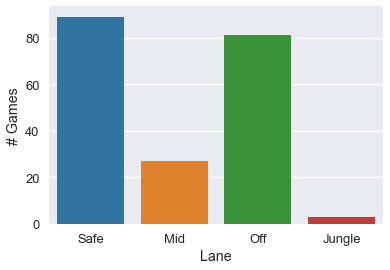

In [15]:
ax = sns.barplot(x='lane',y='game_count',data=lane)
ax.set(xlabel='Lane', ylabel='# Games')

In [16]:
# Above bar-chart shows that Earthshaker is mostly played in safe-lane and off-lane

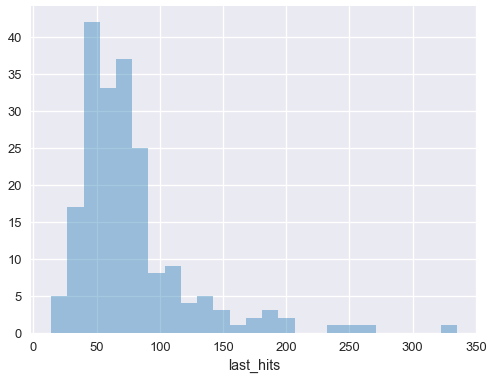

In [17]:
plt.figure(figsize=(8,6))
sns.distplot(es['last_hits'], kde=False)

In [18]:
# Above histogram shows that most earthshaker players have last hits between 40 and 90
# It can also be observed that very small percentage of games had ES's last hits above 200

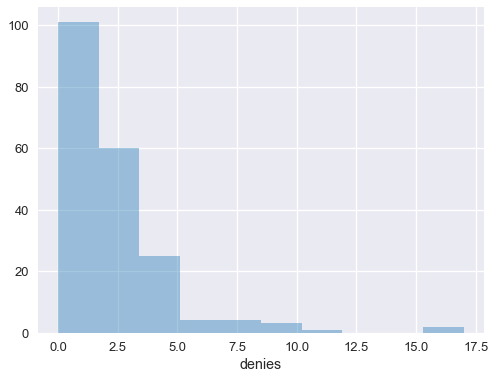

In [19]:
plt.figure(figsize=(8,6))
sns.distplot(es['denies'], kde=False, bins=10)

In [20]:
# Most ES players have denies between 0 and 5

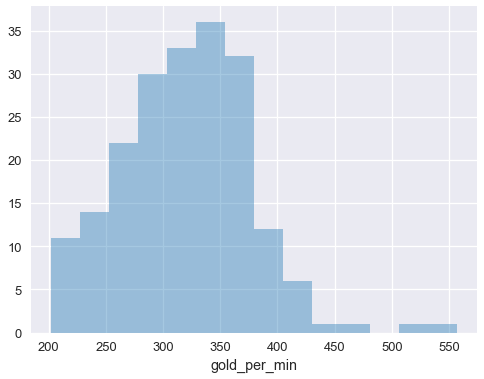

In [21]:
plt.figure(figsize=(8,6))
sns.distplot(es['gold_per_min'], kde=False)

In [22]:
# Above histogram shows that most earthshakers have GPM between 300 and 375 with very few above 500

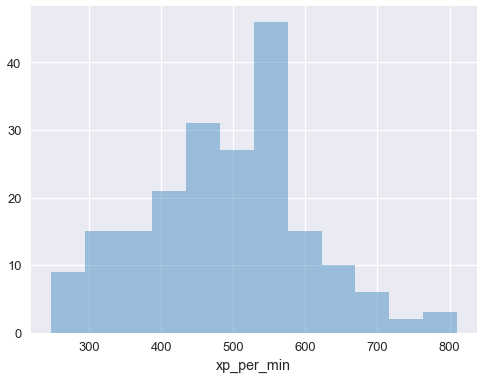

In [23]:
plt.figure(figsize=(8,6))
sns.distplot(es['xp_per_min'], kde=False)

In [24]:
# The distribution of XPM is similar to a normal distribution with majority being between 500 and 600

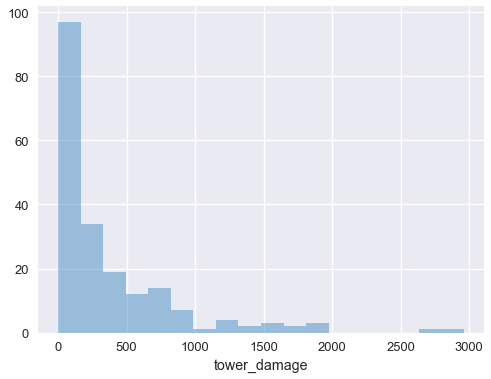

In [25]:
plt.figure(figsize=(8,6))
sns.distplot(es['tower_damage'], kde=False)

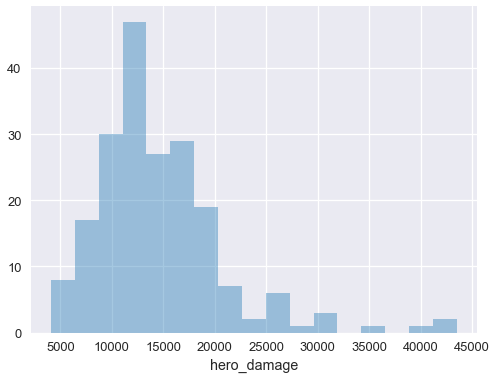

In [26]:
plt.figure(figsize=(8,6))
sns.distplot(es['hero_damage'], kde=False)

In [27]:
# From above graphs it can be seen that most ES deals very less tower damage (<500)
# Most ES deals hero damage between 10000 to 20000

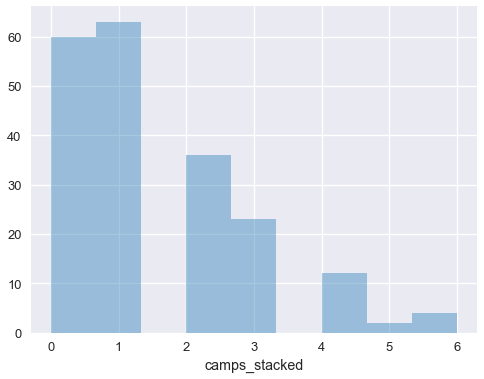

In [28]:
plt.figure(figsize=(8,6))
sns.distplot(es['camps_stacked'], kde=False)

In [29]:
# Most earthshakers do not stack more than 1 neutral camp

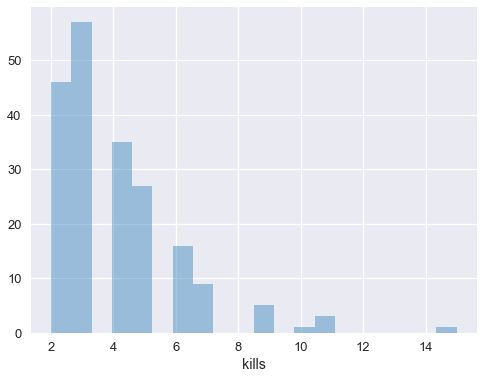

In [30]:
plt.figure(figsize=(8,6))
sns.distplot(es['kills'], kde=False)

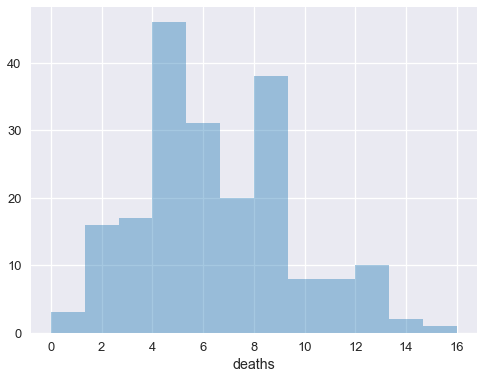

In [31]:
plt.figure(figsize=(8,6))
sns.distplot(es['deaths'], kde=False)

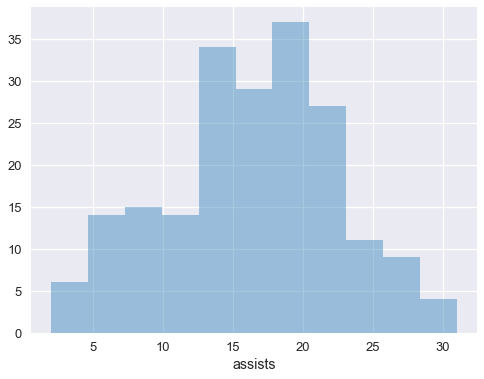

In [32]:
plt.figure(figsize=(8,6))
sns.distplot(es['assists'], kde=False)

In [33]:
# From above 3 histograms, it can be seen that most Earthshakers have less than 5 kills; between 4 and 10 deaths; and around 14-22 assists

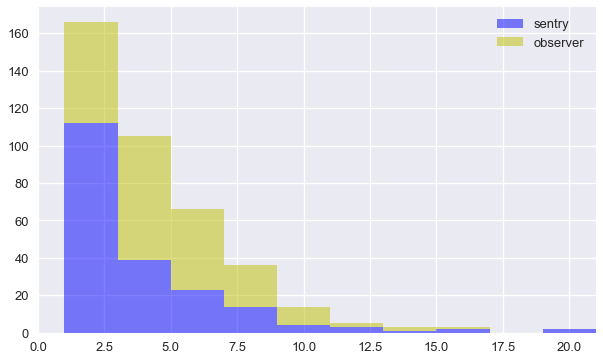

In [34]:
plt.figure(figsize=(10,6))
plt.hist([es.sen_placed, es.obs_placed], color=['b','y'], alpha=0.5, stacked=True)
plt.legend(['sentry', 'observer'])
plt.xlim([0,21])
plt.show()

In [35]:
# Above histogram suggests that Earthshakers usually buy less than 5 sentry and observer wards

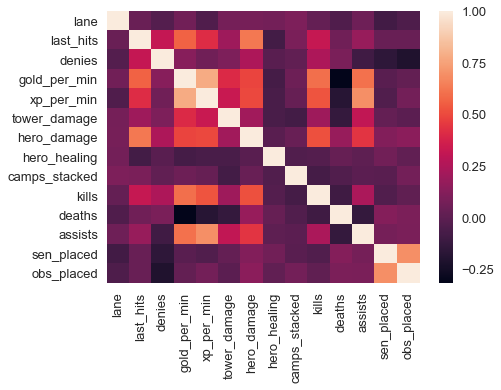

In [36]:
plt.figure(figsize=(7,5))
sns.heatmap(es.corr())

In [37]:
# From above heatmap we can see that last hits is correlated with gold per minute and hero damage
# gold per minute is highly correlated with xp per minute and moderately correlated with last hits, kills and assists
# sentry wards and observer wards are highly correlated with each other

### Clustering

In [38]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()
scaled_es = scaler.fit_transform(es)
scaled_es[:5]

array([[ 0.01048342,  5.76792098,  5.58436352,  4.2114767 ,  2.76420742,
        -0.08995084,  3.34768317, -0.46647552, -1.02270776,  5.36107197,
        -0.12807194, -1.19229266, -0.74354671, -0.92728542],
       [ 1.05882586,  0.01371642, -0.47024095,  0.61914389,  1.62988276,
         0.34074555,  2.56952121, -0.46647552, -0.30752751,  3.41159125,
         1.86785443,  1.22615087, -0.74354671, -0.15934718],
       [ 0.01048342, -0.41004283, -0.87388124,  2.4153103 ,  2.70217404,
         0.07787921,  0.48687802, -0.46647552, -0.30752751,  3.41159125,
         1.53520003,  1.38738044, -0.74354671, -0.92728542],
       [-1.03785902,  4.07288398,  5.98800382,  3.48233984,  2.16159744,
         4.64770951,  4.59382617, -0.46647552, -1.02270776,  3.41159125,
         1.20254564,  0.74246216, -0.74354671, -1.31125453],
       [-1.03785902,  0.57129438, -0.06660065,  1.91736317,  1.8957401 ,
         0.19515804,  1.23571146,  1.12199941, -0.30752751,  2.92422107,
        -1.45868952,  1.06

In [40]:
# We will use elbow method to identify appropriate number of clusters

kmeans_kwargs = {'init': 'k-means++',
                'n_init': 10,
                'max_iter': 300,
                'random_state': 101}

# Compute within cluster sum-square error for each iteration
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(scaled_es)
    wcss.append(kmeans.inertia_)

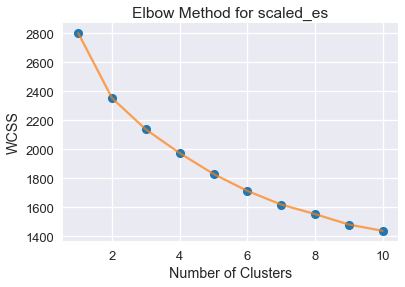

In [41]:
plt.plot(range(1, 11), wcss, 'o')
plt.plot(range(1, 11), wcss, '-', alpha=0.7)
plt.title('Elbow Method for scaled_es')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
# Optimal number of clusters = 5 which is also the actual number of roles in DOTA2 (carry, midlaner, offlaner, soft-support and
# hard-support)

In [43]:
model = KMeans(n_clusters=5, **kmeans_kwargs)

In [44]:
pred = model.fit_predict(scaled_es)
pred[:5]

array([4, 3, 3, 4, 3])

In [45]:
pred

array([4, 3, 3, 4, 3, 3, 3, 0, 3, 3, 3, 0, 2, 0, 0, 3, 0, 0, 0, 3, 2, 1,
       2, 2, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 3, 3, 0, 0, 0, 3, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 0, 3, 0, 3, 3, 1, 3, 3, 0, 0, 1, 2, 3, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 3, 1, 2, 1, 2, 3, 1, 2, 0, 2, 2, 1,
       1, 0, 0, 1, 3, 1, 0, 0, 2, 2, 0, 1, 1, 2, 2, 2, 0, 2, 1, 0, 0, 3,
       0, 2, 0, 0, 0, 3, 2, 2, 0, 1, 3, 0, 0, 1, 1, 0, 0, 3, 0, 1, 1, 0,
       1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0,
       1, 0])

In [46]:
es['predicted_roles'] = pred

In [47]:
es.head()

,lane,last_hits,denies,gold_per_min,xp_per_min,tower_damage,hero_damage,hero_healing,camps_stacked,kills,deaths,assists,sen_placed,obs_placed,predicted_roles
0,2,335,16,557,802,299,35693,0,0,15,6,9,1,2,4
1,3,77,1,355,674,512,30811,0,1,11,12,24,1,4,3
2,2,58,0,456,795,382,17745,0,1,11,11,25,1,2,3
3,1,259,17,516,734,2642,43511,0,0,11,10,21,1,1,4
4,1,102,2,428,704,440,22443,400,1,10,2,23,1,1,3


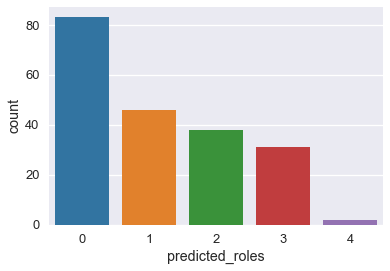

In [48]:
sns.countplot(es['predicted_roles'])

In [49]:
# Clusters 0 has most of the instances indicating majority of earthshakers belong to this cluster's role

In [50]:
clusters = ['cluster 0', 'cluster 1', 'cluster 2', 'cluster 3', 'cluster 4']

In [51]:
lasthits_clusters = []
for i in range(5):
    lasthits_clusters.append(round(es[es['predicted_roles']==i]['last_hits'].mean()))

In [52]:
lasthits_clusters

[70, 54, 71, 119, 297]

[Text(0,0.5,'Avg Last Hits'), Text(0.5,0,'Clusters')]

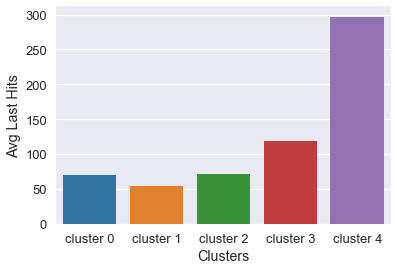

In [53]:
ax = sns.barplot(x=clusters, y=lasthits_clusters)
ax.set(xlabel='Clusters', ylabel='Avg Last Hits')

In [54]:
# It can be seen that cluster 4 Earthshakers have significantly higher last hits

In [55]:
denies_clusters = []
for i in range(5):
    denies_clusters.append(round(es[es['predicted_roles']==i]['denies'].mean()))

In [56]:
denies_clusters

[2, 2, 2, 2, 16]

[Text(0,0.5,'Avg Denies'), Text(0.5,0,'Clusters')]

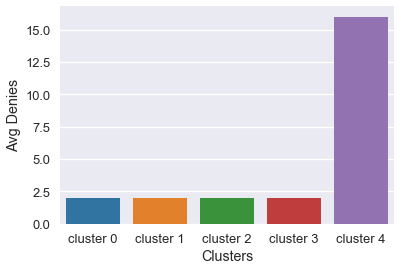

In [57]:
ax = sns.barplot(x=clusters, y=denies_clusters)
ax.set(xlabel='Clusters', ylabel='Avg Denies')

In [58]:
# It can be seen that cluster 4 Earthshakers have maximum denies

In [59]:
gpm_clusters = []
for i in range(5):
    gpm_clusters.append(round(es[es['predicted_roles']==i]['gold_per_min'].mean()))

In [60]:
gpm_clusters

[335, 254, 306, 382, 536]

[Text(0,0.5,'Avg GPM'), Text(0.5,0,'Clusters')]

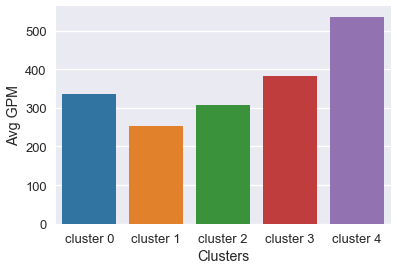

In [61]:
ax = sns.barplot(x=clusters, y=gpm_clusters)
ax.set(xlabel='Clusters', ylabel='Avg GPM')

In [62]:
# Cluster 4 Earthshakers have the highest gpm indicating that cluster 4 has highest farm priority

In [63]:
xpm_clusters = []
for i in range(5):
    xpm_clusters.append(round(es[es['predicted_roles']==i]['xp_per_min'].mean()))

In [64]:
xpm_clusters

[512, 349, 493, 619, 768]

[Text(0,0.5,'Avg XPM'), Text(0.5,0,'Clusters')]

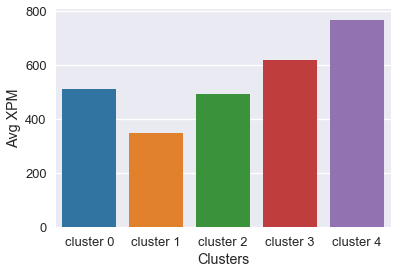

In [65]:
ax = sns.barplot(x=clusters, y=xpm_clusters)
ax.set(xlabel='Clusters', ylabel='Avg XPM')

In [66]:
# It can be seen that clusters 4 has maximum xpm followed by cluster 3
# Which means teams prioritize ES's xpm priority in these roles 

In [67]:
tower_dmg_clusters = []
for i in range(5):
    tower_dmg_clusters.append(round(es[es['predicted_roles']==i]['tower_damage'].mean()))

In [68]:
tower_dmg_clusters

[350, 79, 218, 799, 1470]

[Text(0,0.5,'Avg Tower Damage'), Text(0.5,0,'Clusters')]

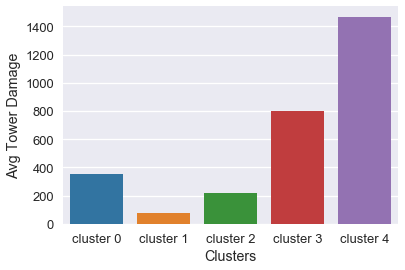

In [69]:
ax = sns.barplot(x=clusters, y=tower_dmg_clusters)
ax.set(xlabel='Clusters', ylabel='Avg Tower Damage')

In [70]:
# Earthshakers belonging to cluster 4 deals the maximum tower damage on average followed by cluster 3
# Cluster 1 and 2 deals the lowest

In [71]:
hero_dmg_clusters = []
for i in range(5):
    hero_dmg_clusters.append(round(es[es['predicted_roles']==i]['hero_damage'].mean()))

In [72]:
hero_dmg_clusters

[13285, 10388, 16528, 20977, 39602]

[Text(0,0.5,'Avg Hero Damage'), Text(0.5,0,'Clusters')]

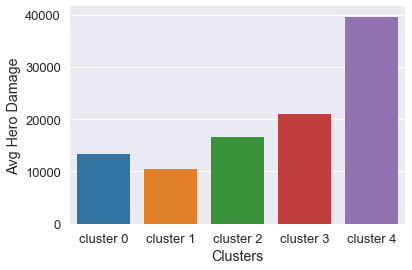

In [73]:
ax = sns.barplot(x=clusters, y=hero_dmg_clusters)
ax.set(xlabel='Clusters', ylabel='Avg Hero Damage')

In [74]:
# It can be seen that cluster 4 Earthshakers deals significantly higher hero damage

In [75]:
hero_heal_clusters = []
for i in range(5):
    hero_heal_clusters.append(round(es[es['predicted_roles']==i]['hero_healing'].mean()))

In [76]:
hero_heal_clusters

[119, 122, 164, 58, 0]

[Text(0,0.5,'Avg Hero Healing'), Text(0.5,0,'Clusters')]

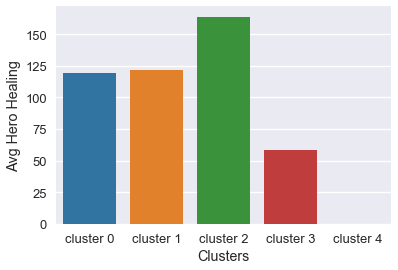

In [77]:
ax = sns.barplot(x=clusters, y=hero_heal_clusters)
ax.set(xlabel='Clusters', ylabel='Avg Hero Healing')

In [78]:
# Cluster 4 Earthshakers provide 0 heals to his allies suggesting that players playing ES in this role only prioritize their game
# Earthshakers belonging to cluster 2 provide maximum heals to their allies suggesting more of a support role

In [79]:
stack_clusters = []
for i in range(5):
    stack_clusters.append(round(es[es['predicted_roles']==i]['camps_stacked'].mean()))

In [80]:
stack_clusters

[2, 1, 1, 1, 0]

[Text(0,0.5,'Avg Neutral Camps Stacked'), Text(0.5,0,'Clusters')]

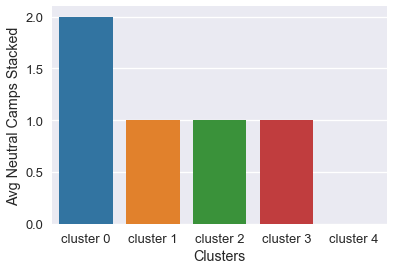

In [81]:
ax = sns.barplot(x=clusters, y=stack_clusters)
ax.set(xlabel='Clusters', ylabel='Avg Neutral Camps Stacked')

In [82]:
# On average cluster 0 earthshakers stack most neutral creep camps whereas cluster 4 earthshakers do not stack

In [83]:
kills_clusters = []
for i in range(5):
    kills_clusters.append(round(es[es['predicted_roles']==i]['kills'].mean()))

In [84]:
kills_clusters

[4, 3, 4, 6, 13]

[Text(0,0.5,'Avg Kills'), Text(0.5,0,'Clusters')]

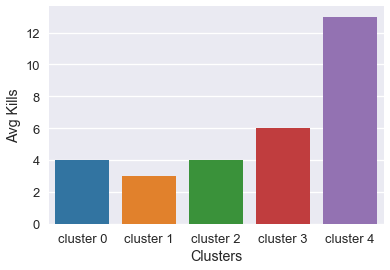

In [85]:
ax = sns.barplot(x=clusters, y=kills_clusters)
ax.set(xlabel='Clusters', ylabel='Avg Kills')

In [86]:
# Cluster 4 earthshakers kills most of the enemy heroes indicating they itemize in order to kill enemies

In [87]:
deaths_clusters = []
for i in range(5):
    deaths_clusters.append(round(es[es['predicted_roles']==i]['deaths'].mean()))

In [88]:
deaths_clusters

[5, 8, 8, 7, 8]

[Text(0,0.5,'Avg Deaths'), Text(0.5,0,'Clusters')]

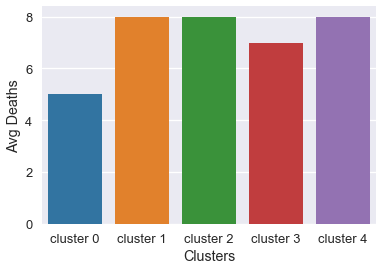

In [89]:
ax = sns.barplot(x=clusters, y=deaths_clusters)
ax.set(xlabel='Clusters', ylabel='Avg Deaths')

In [90]:
# Cluster 0 earthshakers have least deaths suggesting that they play safer compared to other cluster's earthshakers
# However, the difference in average deaths among the clusters is not too significant

In [91]:
assist_clusters = []
for i in range(5):
    assist_clusters.append(round(es[es['predicted_roles']==i]['assists'].mean()))

In [92]:
assist_clusters

[18, 9, 17, 23, 15]

[Text(0,0.5,'Avg Assists'), Text(0.5,0,'Clusters')]

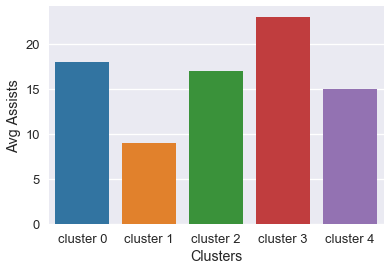

In [93]:
ax = sns.barplot(x=clusters, y=assist_clusters)
ax.set(xlabel='Clusters', ylabel='Avg Assists')

In [94]:
# Cluster 3 earthshakers have highest average assists indicating that this cluster's ES participate in majority of teamfights
# Cluster 1 earthshakers on the other hand have lowest assists, so this cluster's ES stay away from teamfights

In [95]:
sentry_clusters = []
for i in range(5):
    sentry_clusters.append(round(es[es['predicted_roles']==i]['sen_placed'].mean()))

In [96]:
sentry_clusters

[2, 2, 7, 3, 1]

[Text(0,0.5,'Avg Sentry Placed'), Text(0.5,0,'Clusters')]

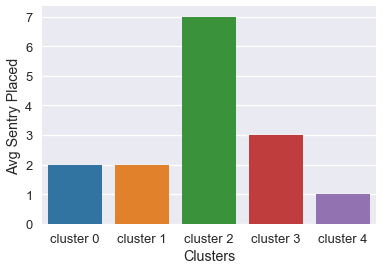

In [97]:
ax = sns.barplot(x=clusters, y=sentry_clusters)
ax.set(xlabel='Clusters', ylabel='Avg Sentry Placed')

In [98]:
# Cluster 2 earthshakers buys majority of the sentry wards suggesting a support role

In [99]:
obs_clusters = []
for i in range(5):
    obs_clusters.append(round(es[es['predicted_roles']==i]['obs_placed'].mean()))

In [100]:
obs_clusters

[4, 3, 8, 4, 2]

[Text(0,0.5,'Avg Observers Placed'), Text(0.5,0,'Clusters')]

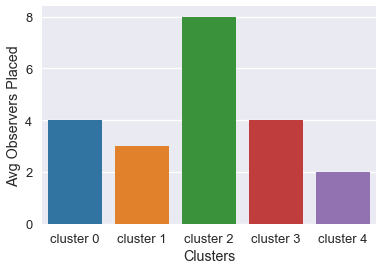

In [101]:
ax = sns.barplot(x=clusters, y=obs_clusters)
ax.set(xlabel='Clusters', ylabel='Avg Observers Placed')

In [102]:
# Cluster 2 earthshakers buys majority of the observer wards as well suggesting a support role

### Final Verdict

In [103]:
# Based on all the graphs, it seems that the roles that each cluster represents are:
# Cluster 0 : Offlaner (Third highest GPM, XPM and tower damage)
# Cluster 1 : Hard Support (Lowest last hits, GPM, XPM and damage)
# Cluster 2 : Soft Support (Among probable support roles, it had higher GPM, XPM, last hits and damage. Very similar to offlaner)
# Cluster 3 : Midlaner (Second highest last hits, GPM, XPM and damage. Number of instances is also second lowest)
# Cluster 4 : Carry (Highest last hits, GPM, XPM and damage indicates highest farm priority. Number of instances is also least since it is not a common role for Earthshaker)

In [104]:
# Offlaner and Soft Support were the most difficult to identify since both these clusters had almost identical statistics. 
# One reason for this could be the fact that both these positions are played in the offlane and thus offers very similar impact.

### Usefulness of This Project

In [105]:
# This concept of role identification could be used for identifying players who do not play their assigned roles in game. It could then be used to update the player's in-game behavioral score.
# It could also be used to validate reports against a player for not playing assigned role. Thus identifying if the report against the player was true or false.